# Testing the Model

### Import the Modules

In [2]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.preprocessing import image

### Load the Trained Model

In [3]:
# Load your saved model
model = load_model(r"Flask/breastcancer.h5")
print("✅ Model loaded successfully!")
model.summary()

✅ Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,331 (4.87 MB)

 Trainable params: 1,274,369 (4.86 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

### Prepare the Validation Dataset & Evaluate the Model

In [4]:
image_size = 50
batch_size = 32

AUTOTUNE = tf.data.AUTOTUNE

val_ds = tf.keras.utils.image_dataset_from_directory(
    "breastcancerdataset/test",
    label_mode='binary',
    image_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False
)

# Evaluate
loss, accuracy = model.evaluate(val_ds)
print(f"📉 Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

Found 55505 files belonging to 2 classes.
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9553 - loss: 1982.9119
📉 Test Loss: 12504.8047
✅ Test Accuracy: 71.70%


### Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

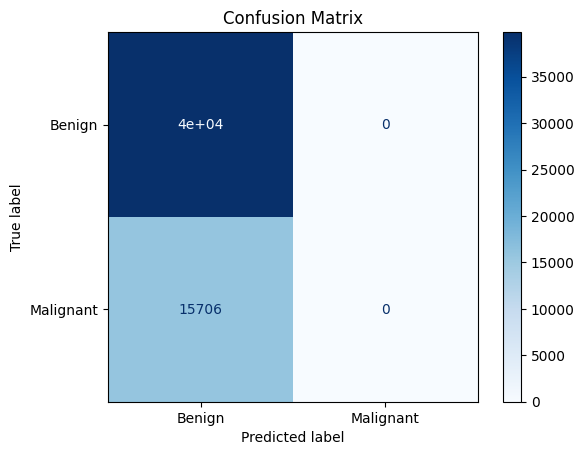

In [5]:
# Generate predictions and true labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype("int32").flatten())

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [6]:
# Show precision, recall, F1-score
print("📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Benign", "Malignant"]))

📄 Classification Report:
              precision    recall  f1-score   support

      Benign       0.72      1.00      0.84     39799
   Malignant       0.00      0.00      0.00     15706

    accuracy                           0.72     55505
   macro avg       0.36      0.50      0.42     55505
weighted avg       0.51      0.72      0.60     55505



c:\Users\sohil\anaconda3\envs\AICourse\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sohil\anaconda3\envs\AICourse\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sohil\anaconda3\envs\AICourse\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

### Predict on Multiple Images as required by the user

In [11]:
def predict_multiple_random_images_with_accuracy(test_dir, target_size=(50, 50)):
    # Step 1: Get all image paths with actual label from folder name
    all_images = []
    for root, dirs, files in os.walk(test_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                full_path = os.path.join(root, file)
                actual_label = os.path.basename(root).capitalize()  # 'Benign' or 'Malignant'
                all_images.append((full_path, actual_label))

    # Step 2: Ask user how many predictions
    try:
        num_trials = int(input("How many random test image predictions do you want to run? "))
    except ValueError:
        print("❌ Please enter a valid number.")
        return

    correct = 0

    # Step 3: Run predictions
    for i in range(num_trials):
        img_path, actual_label = random.choice(all_images)
        filename = os.path.basename(img_path)

        # Load and preprocess
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array, verbose=0)[0][0]
        predicted_label = "Malignant" if prediction > 0.5 else "Benign"

        # Accuracy count
        if predicted_label.lower() == actual_label.lower():
            correct += 1

        # Display results
        print(f"\n🧪 Trial {i+1}: {filename}")
        print(f"   ✅ Actual   : {actual_label}")
        print(f"   🤖 Predicted: {predicted_label} ({prediction:.4f})")

        plt.imshow(img)
        plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
        plt.axis("off")
        plt.show()

    # Step 4: Final accuracy report
    accuracy = (correct / num_trials) * 100
    print(f"\n📊 Summary: {correct} / {num_trials} correct predictions")
    print(f"🎯 Accuracy: {accuracy:.2f}%")

### Use the Prediction Function


🧪 Trial 1: 8956_idx5_x1851_y1101_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0000)


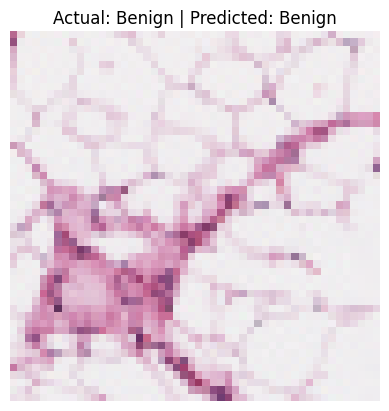


🧪 Trial 2: 9173_idx5_x2651_y1951_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0010)


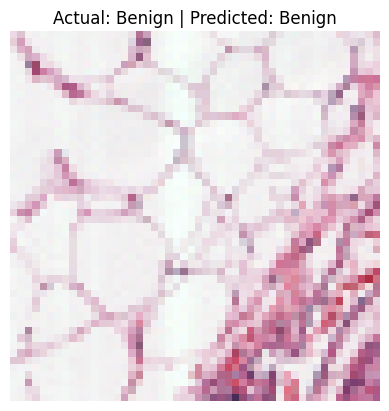


🧪 Trial 3: 12867_idx5_x1401_y401_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0000)


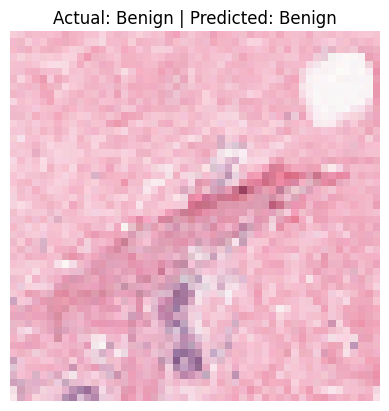


🧪 Trial 4: 10262_idx5_x1251_y1451_class1.png
   ✅ Actual   : Malignant
   🤖 Predicted: Benign (0.0000)


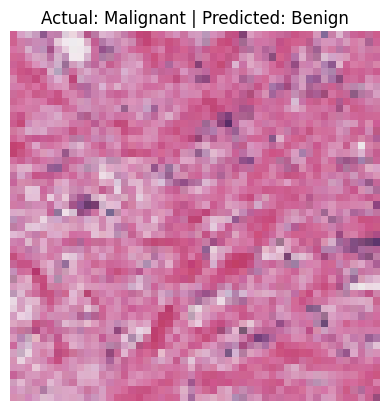


🧪 Trial 5: 14188_idx5_x1551_y1051_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0010)


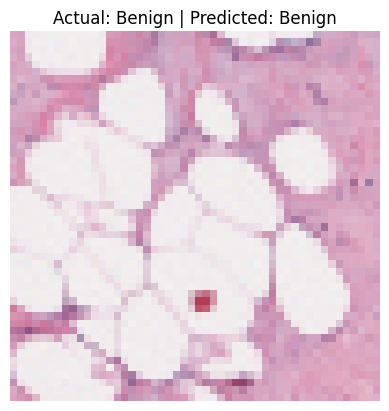


🧪 Trial 6: 10299_idx5_x401_y751_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0000)


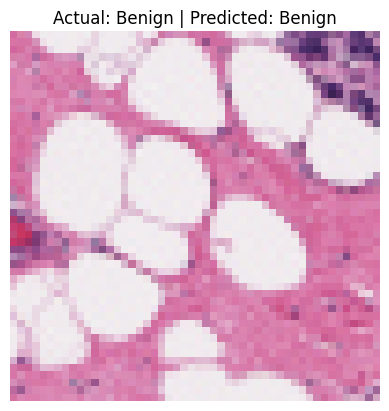


🧪 Trial 7: 8975_idx5_x1501_y1601_class1.png
   ✅ Actual   : Malignant
   🤖 Predicted: Malignant (0.8496)


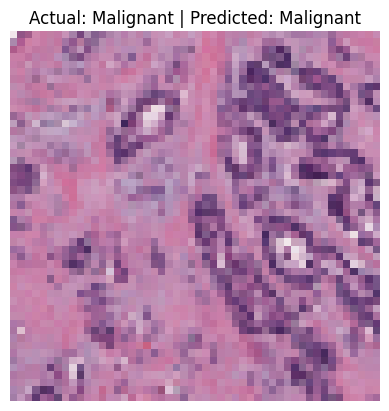


🧪 Trial 8: 8918_idx5_x951_y951_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0008)


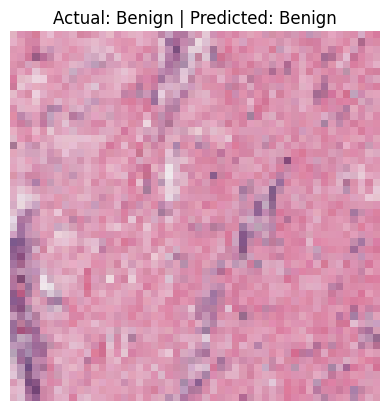


🧪 Trial 9: 12911_idx5_x1751_y2451_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0000)


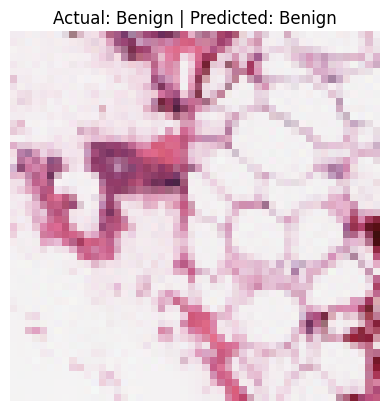


🧪 Trial 10: 9083_idx5_x601_y201_class0.png
   ✅ Actual   : Benign
   🤖 Predicted: Benign (0.0001)


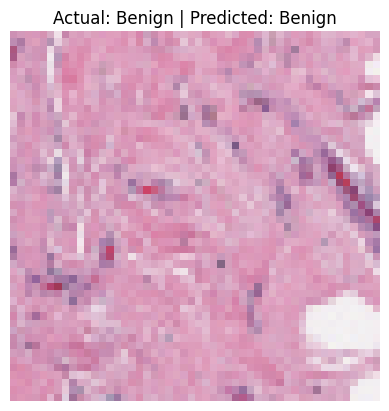


📊 Summary: 9 / 10 correct predictions
🎯 Accuracy: 90.00%


In [12]:
predict_multiple_random_images_with_accuracy("breastcancerdataset/test")